# **Actividad Semanal 6, Visualizacion**
Hector Manuel Gonzalez Villarreal   A00178679

Prof: Maria de Paz Rico

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

df = pd.read_csv('./sample_data/datossemana7.csv', index_col=0)
df.describe()


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,29999.000000,29998.000000,29998.000000,29995.000000,29997.000000,29995.000000,29993.000000,29991.000000,29984.000000,...,29985.000000,29983.000000,29990.000000,29992.000000,2.999100e+04,29992.000000,29989.000000,29989.000000,29995.000000,29997.000000
mean,167484.322667,1.603753,1.853057,1.551903,35.484214,-0.016635,-0.133689,-0.166405,-0.220800,-0.266342,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.623400,4827.252526,4800.297209,5216.259977,0.221189
std,129747.661567,0.489125,0.790320,0.521968,9.218024,1.123829,1.197254,1.196048,1.169153,1.133296,...,64345.500073,60809.984983,59561.312967,16564.165089,2.304418e+04,17608.422625,15668.751975,15280.842069,17778.848359,0.415054
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2329.000000,1763.500000,1256.250000,1000.000000,8.355000e+02,390.000000,296.000000,251.000000,118.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18107.000000,17081.000000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54560.000000,50213.000000,49208.250000,5006.000000,5.000000e+03,4505.500000,4014.000000,4033.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [3]:
#cehcamos si hay nulos
df.isnull().any()


X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

In [4]:
#revisamos datos validos entre las columnas segun el modelo
#Columna Gender
df.groupby(['X2']).size()
#todos los datos son validos

X2
1.0    11887
2.0    18112
dtype: int64

In [5]:
df.groupby(['X3']).size()
#Aqui en esta columna encontramos datos no validos los datows perminitidos son 1,2,3 y 4 y tienes valores de 0,5 y 6
menoresde1 = df[ (df['X3'] < 1)].index
mayoresde4 = df[ (df['X3'] > 4)].index
df.drop(menoresde1 , inplace=True)
df.drop(mayoresde4 , inplace=True)
df.groupby(['X3']).size()


X3
1.0    10585
2.0    14030
3.0     4915
4.0      123
dtype: int64

In [6]:
# Columna Marital Estatus
df.groupby(['X4']).size()
#Aqui en esta columna encontramos datos no validos los datow perminitidos son 1,2,3 tienes valores de 0
menoresde1 = df[ (df['X4'] < 1)].index
df.drop(menoresde1 , inplace=True)
df.groupby(['X4']).size()


X4
1.0    13475
2.0    15806
3.0      318
dtype: int64

In [7]:
# Columnas de Past Payment X6 a la X11
cols = ['X6', 'X7', 'X8','X9', 'X10', 'X11']
#df.loc[:,cols].describe()
#Aqui encontramos que el valor de dato minimo es de -2 siendo el permitido -1, se eliminaran todos los -2 de esas columnas
menoresdemenos1 = df[ (df['X6'] < -1)].index
df.drop(menoresdemenos1 , inplace=True)
menoresdemenos1 = df[ (df['X7'] < -1)].index
df.drop(menoresdemenos1 , inplace=True)
menoresdemenos1 = df[ (df['X8'] < -1)].index
df.drop(menoresdemenos1 , inplace=True)
menoresdemenos1 = df[ (df['X9'] < -1)].index
df.drop(menoresdemenos1 , inplace=True)
menoresdemenos1 = df[ (df['X10'] < -1)].index
df.drop(menoresdemenos1 , inplace=True)
menoresdemenos1 = df[ (df['X11'] < -1)].index
df.drop(menoresdemenos1 , inplace=True)
#datos.loc[:,cols].describe()
#con esta limpia de datos correctos la base baja a 23,117 es decir un 77.05%

In [8]:
df.dropna(inplace=True)
df.isnull().any()


X1     False
X2     False
X3     False
X4     False
X5     False
X6     False
X7     False
X8     False
X9     False
X10    False
X11    False
X12    False
X13    False
X14    False
X15    False
X16    False
X17    False
X18    False
X19    False
X20    False
X21    False
X22    False
X23    False
Y      False
dtype: bool

In [9]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000,...,23117.000000,23117.000000,23117.000000,23117.000000,2.311700e+04,23117.000000,23117.000000,23117.000000,23117.000000,23117.000000
mean,156350.896743,1.591945,1.851797,1.564260,35.240732,0.180300,0.188822,0.174114,0.132889,0.091405,...,53298.567461,49821.225851,47951.038716,6075.115456,6.124092e+03,5565.513259,5092.921530,5051.622356,5340.183285,0.231561
std,127580.413394,0.491484,0.699920,0.518718,9.286893,0.985017,1.034631,1.021109,0.987852,0.940703,...,68105.827215,64379.093107,63149.590835,16908.988937,2.031537e+04,18144.539904,15553.762821,14956.812957,17311.628592,0.421839
min,10000.000000,1.000000,1.000000,1.000000,21.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9906.000000,9222.000000,7722.000000,1402.000000,1.332000e+03,1000.000000,739.000000,716.000000,632.000000,0.000000
50%,120000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,28298.000000,26373.000000,25044.000000,2600.000000,2.500000e+03,2000.000000,2000.000000,2000.000000,2000.000000,0.000000
75%,220000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,70298.000000,65403.000000,62312.000000,5500.000000,5.197000e+03,5000.000000,4770.000000,4694.000000,4510.000000,0.000000
max,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [10]:
from sklearn.preprocessing import StandardScaler
features = ['X1', 'X2', 'X3','X4', 'X5','X6', 'X7', 'X8','X9', 'X10', 'X11', 'X12', 'X13','X14', 'X15','X16', 'X17', 'X18','X19', 'X20', 'X21','X22', 'X23']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['Y']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [11]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])


In [12]:
finalDf = pd.concat([principalDf, df[['Y']]], axis = 1)

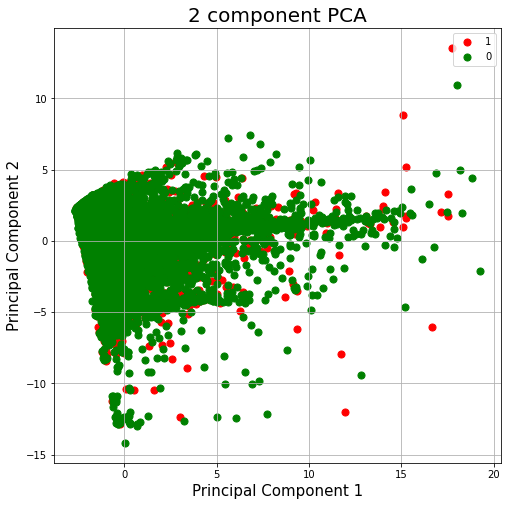

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Y'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

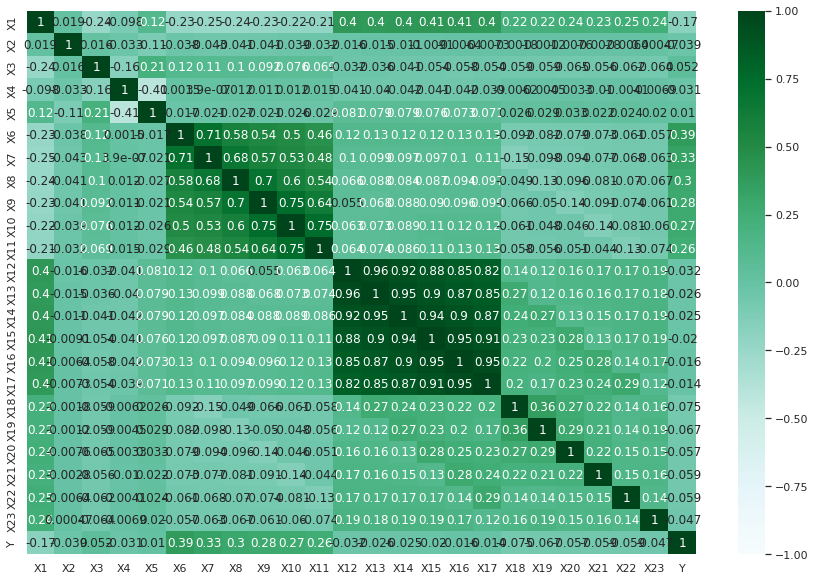

In [14]:
df.corr()

corrs = df.corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrs, vmin = -1, vmax = 1, cmap = "BuGn", annot= True)
# Aqui vemos que el las correlaciones fuerets estan entre la X12 y X17

Buscando una correlacion de las variables vemos que las variables X12 a 17 son las que tienen mayor correlacion entre las 23, haremos un df solo con esas a continuación

In [15]:
ndf = df[['X12', 'X13', 'X14', 'X15', 'X16', 'X17','Y']]
# Cambiamos nombres para mejor entendimiento o claridad
ndf.columns=['Sept', 'Ago', 'Jul', 'Jun', 'May', 'Abr','Pago']
ndf = ndf.dropna(axis=0)
#ndf.columns revision de que el renombrado esta correcto
var=np.cov([ndf.Sept,ndf.Ago,ndf.Jul,ndf.Jun,ndf.May,ndf.Abr,ndf.Pago])
t=ndf.var().sum()
VarSept = var[0][0]
VarAgo = var[1][1]
VarJul = var[2][2]
VarJun = var[3][3]
VarMay = var[4][4]
VarAbr= var[5][5]
VarPago= var[6][6]

In [16]:
print('Varianza Total \t\t\t :', t.round(2))
print('Varianza de Septiembre \t\t :', ((VarSept/t)*100).round(2), '%')
print('Varianza de Agosto \t\t :', ((VarAgo/t)*100).round(2), '%')
print('Varianza de Julio \t\t :', ((VarJul/t)*100).round(2), '%')
print('Varianza de Junio \t\t :', ((VarJun/t)*100).round(2), '%')
print('Varianza de Mayo \t\t :', ((VarMay/t)*100).round(2), '%')
print('Varianza de Abril \t\t :', ((VarAbr/t)*100).round(2), '%')
print('Varianza de Pago \t\t :', ((VarPago/t)*100).round(2), '%')

Varianza Total 			 : 29706264599.69
Varianza de Septiembre 		 : 20.3 %
Varianza de Agosto 		 : 19.06 %
Varianza de Julio 		 : 17.65 %
Varianza de Junio 		 : 15.61 %
Varianza de Mayo 		 : 13.95 %
Varianza de Abril 		 : 13.42 %
Varianza de Pago 		 : 0.0 %


Aqui con la varianza nos damos cuenta que los valores de septiempre, agosto y julio son los que mas determinan la aprbacion del credito

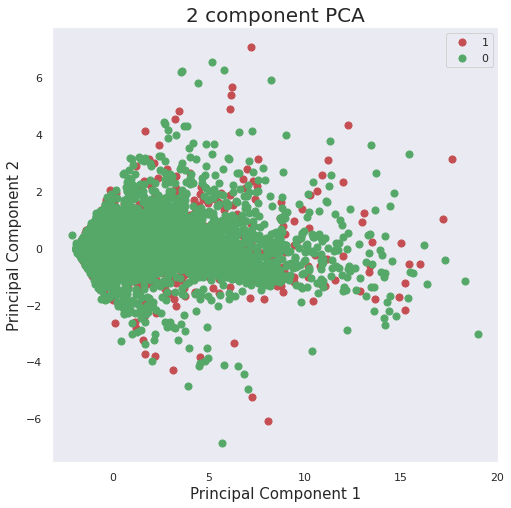

In [19]:
features = ['Sept', 'Ago', 'Jul', 'Jun', 'May', 'Abr']
# Separating out the features
x = ndf.loc[:, features].values
# Separating out the 
y = ndf.loc[:,['Pago']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2'])
finalDf = pd.concat([principalDf, ndf[['Pago']]], axis = 1)
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 0]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Pago'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'pc1']
               , finalDf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

Aun haciendo el PCA sobre solo las 6 columnas con una buena correlacion nos da el mismo resultado